In [1]:
import arlpy.uwapm as pm
import numpy as np

In [2]:
x = np.linspace(-5000, 5000, 1080)
z = np.linspace(0, 500,  720)
depth = 450

In [3]:
ssp_depth = np.array([10, 150, 200, 250, 300, 400])
ssp       = np.array([1400, 1380, 1390, 1400, 1410, 1400])

In [4]:
tx_freq  = 500
tx_depth = 10

In [5]:
env = pm.make_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP/KRAKEN attn
        volume_attn     = None,
        
        # ALL: Receiver positoins
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # ALL: Sound speed profiles
        ssp_depth       = ssp_depth,                                           # m
        ssp             = ssp,                                                 # m/s

        # OALIB: Sound speed interpolation
        ssp_interp      = 'c-linear',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                                             # Hz
        tx_depth        = tx_depth,                                            # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((0, depth)),                 # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.75,                                                # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

In [6]:
KRAKEN = pm.KRAKEN(env, cp=True)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Modes] First 5 Shapes'}, ylabel='Depth [m]'>)

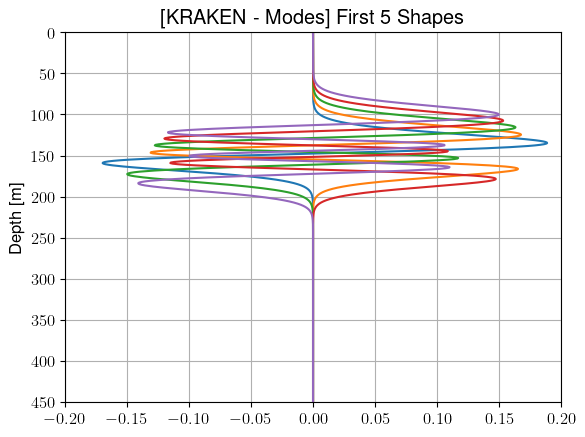

In [7]:
KRAKEN.compute_modes()
KRAKEN.plot_modes(5)

In [8]:
KRAKEN.compute_transmission_loss()

array([[ 1.77711218e-15+2.99846190e-15j, -1.78142908e-15+2.00082332e-15j,
        -2.36851291e-15-1.19859334e-15j, ...,
        -2.36851291e-15-1.19859334e-15j, -1.78142908e-15+2.00082332e-15j,
         1.77711218e-15+2.99846190e-15j],
       [-1.53978457e-04-4.20954690e-04j,  2.66556221e-04-6.79065590e-04j,
        -1.30866624e-06+3.09832831e-04j, ...,
        -1.30866624e-06+3.09832831e-04j,  2.66556221e-04-6.79065590e-04j,
        -1.53978457e-04-4.20954690e-04j],
       [-3.05620721e-04-8.07375181e-04j,  5.71848999e-04-9.99497366e-04j,
         1.10348068e-04+5.61596651e-04j, ...,
         1.10348068e-04+5.61596651e-04j,  5.71848999e-04-9.99497366e-04j,
        -3.05620721e-04-8.07375181e-04j],
       ...,
       [ 1.68451916e-05-6.85481718e-05j, -4.26567975e-04+1.96680139e-05j,
         1.33559122e-04-1.11095644e-04j, ...,
         1.33559122e-04-1.11095644e-04j, -4.26567975e-04+1.96680139e-05j,
         1.68451916e-05-6.85481718e-05j],
       [-7.52034248e-05-4.75852830e-05j, -3.

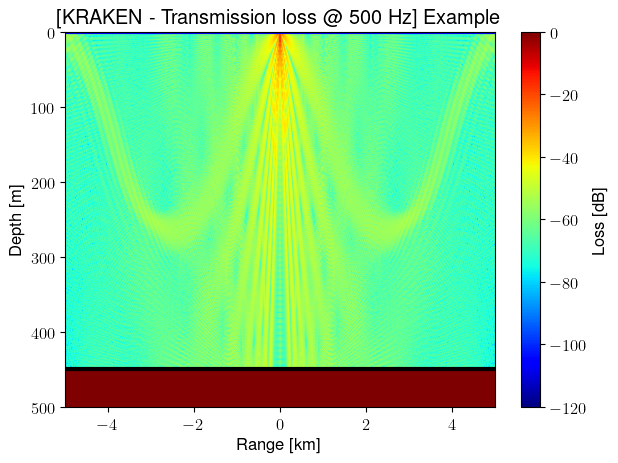

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[KRAKEN - Transmission loss @ 500 Hz] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [9]:
KRAKEN.plot_transmission_loss()

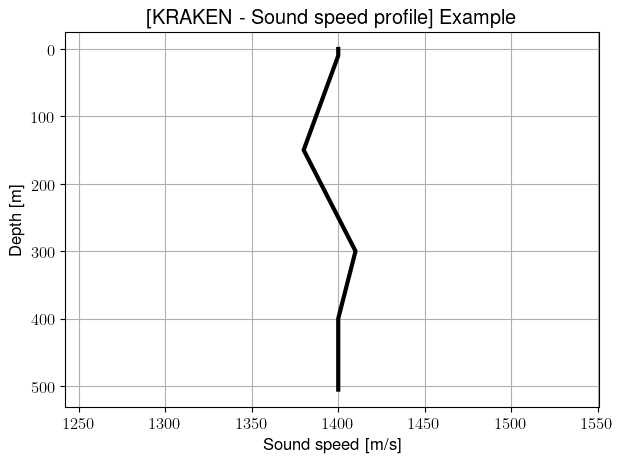

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Sound speed profile] Example'}, xlabel='Sound speed [m/s]', ylabel='Depth [m]'>)

In [10]:
KRAKEN.plot_ssp()